<img src="images/bannerugentdwengo.png" alt="Banner" width="400"/>

<div>
    <font color=#690027 markdown="1">
        <h1>STATISTIEK MET PYTHON 4: DATA ANALYSEREN - CENTRUMMATEN</h1> 
    </font>
</div>

Uit een frequentietabel kan je informatie halen over alle verschillende gegevens afzonderlijk. Maar wie een krant leest zal daar zelden een frequentietabel zien staan. Termen zoals *het gemiddelde* zijn aantrekkelijker omdat ze a.d.h.v. één getal informatie uit een hele dataset samenvatten. Maar ze kunnen ook 'te veel samenvatten'. En dan kan er belangrijke informatie verloren gaan. 

#### De nodige modules importeren

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.min_rows", 50)     # om tot 50 rijen van een tabel op scherm  te tonen

<div>
    <font color=#690027 markdown="1">
        <h2>1. Gemiddelde</h2> 
    </font>
</div>

<div class="alert alert-box alert-success">
    Het <b>gemiddelde</b> van een aantal getallen is de som van de getallen gedeeld door het aantal getallen. Het gemiddelde is een <b>centrummaat</b>. 
</div>

<div>
    <font color=#690027 markdown="1">
        <h3>1.1 Gemiddelde berekenen met Python</h3> 
    </font>
</div>

Als voorbeeld gebruik je de dataset `MrBeast.csv`. Deze dataset bevat statistieken van alle video's van MrBeast, een van de meest populaire kanalen op YouTube. De dataset bevat gegevens die publiek zijn op YouTube [1; 2].

Via de volgende code-cel wordt de data ingeladen en wordt ernaar verwezen met een variabele.

In [2]:
# dataset
mrBeast = pd.read_csv("data/MrBeast.csv")   
mrBeast                                      # dataset op scherm tonen

,title,id,published_at,description,viewCount,likeCount,commentCount,duration_seconds,subtitles
0,I Paid A Real Assassin To Try To Kill Me,YLt73w6criQ,2023-03-18 20:00:01,File with TurboTax today to get your biggest r...,65789233,3263127,94988,737,({'YLt73w6criQ': [{'text': '- Behind me is an ...
1,Do Men Lie About Their Height?,lglIQkCHO0g,2023-02-14 21:00:14,New Merch - https://shopmrbeast.com/\n\nSUBSCR...,105465673,6331840,16467,47,({'lglIQkCHO0g': [{'text': 'how tall are you u...
2,"1,000 Blind People See For The First Time",TJ2ifmkGGus,2023-01-28 21:00:00,If you would like to support more of this sigh...,126742806,9139307,396100,481,"({'TJ2ifmkGGus': [{'text': '- In this video,',..."
3,I Survived 50 Hours In Antarctica,7IKab3HcfFk,2022-12-24 20:59:59,Check out my interview! http://bit.ly/Shopify-...,104436108,4132756,151610,730,({'7IKab3HcfFk': [{'text': '- We just landed i...
4,Hydraulic Press Vs Lamborghini,h5NvTTOlOtI,2022-12-10 21:00:01,Hello Neighbor 2 is out now on PC & Consoles!\...,135219616,4744203,131142,625,"({'h5NvTTOlOtI': [{'text': ""- We're about to t..."
5,Would You Fly To Paris For A Baguette?,se50viFJ0AQ,2022-12-08 20:12:27,New Merch - https://shopmrbeast.com/\n\nSUBSCR...,625420481,31061762,65453,48,({'se50viFJ0AQ': [{'text': 'if I give you a hu...
6,"100 Kids Vs 100 Adults For $500,000",0CTp1a-aCUM,2022-12-03 21:00:00,The new Nerf Pro Gelfire x MrBeast blaster is ...,129999773,3374776,95069,923,({'0CTp1a-aCUM': [{'text': '- [Mr Beast] I bui...
7,Gordon Ramsay Tries Most Expensive Chocolate Bar!,FD-0KG-h2-c,2022-11-19 20:59:59,New Merch - https://shopmrbeast.com/\n\nSUBSCR...,166679589,10164625,24083,41,"({'FD-0KG-h2-c': [{'text': ""I'm gonna ask Gord..."
8,"Last To Take Hand Off Jet, Keeps It!",kX3nB4PpJko,2022-11-12 21:00:00,Close this and watch to the end to see who win...,99163538,3461582,104251,937,({'kX3nB4PpJko': [{'text': '- I spent two and ...
9,Giving iPhones Instead Of Candy on Halloween,YlvcFJOE-OE,2022-11-02 21:00:01,New Merch - https://shopmrbeast.com/\n\nSUBSCR...,501496565,19883090,80478,40,({'YlvcFJOE-OE': [{'text': 'hey you want an iP...


### Opdracht 1.1.1: Gemiddelde schatten
Je gaat op zoek naar het gemiddeld aantal minuten dat een video op het kanaal duurt. 
- Surf eerst eens naar het kanaal en probeer op het eerste zicht een schatting te maken van de gemiddelde lengte van een video.

Antwoord:

Antwoord: 15 minuten

### Opdracht 1.1.2: Gemiddelde berekenen

In de Python-module `pandas` kan je de gemiddelde duurtijd berekenen door de methode `mean()` toe te passen op de kolom van het DataFrame waar de duurtijd van de video's in opgenomen zijn. 

-  Zonder dus eerst de kolom `duration_seconds` af. 
-  Bekijk deze kolom op het scherm.
-  Merk op dat de duurtijd van de video's gegeven is in seconden.

In [ ]:
# kolom met duurtijd


In [3]:
# voorbeeldcode
# kolom met duurtijd
mrBeast_videoduur = mrBeast["duration_seconds"]
mrBeast_videoduur                                   # duurtijd op scherm tonen 

0       737
1        47
2       481
3       730
4       625
5        48
6       923
7        41
8       937
9        40
10      941
11       55
12     1030
13      743
14      494
15      931
16     1013
17      784
18     1021
19      839
20      541
21      481
22      729
23      725
24      662
       ... 
703    1194
704     158
705      88
706      58
707      64
708     193
709     154
710     319
711     327
712     261
713     215
714     268
715     564
716     273
717      53
718     155
719     222
720     134
721      49
722      52
723      29
724      31
725     126
726      90
727     157
Name: duration_seconds, Length: 728, dtype: int64

-  Pas de methode `mean()` toe op deze kolom om de gemiddelde duurtijd van een video te berekenen.
-  Laat een antwoordzin verschijnen op het scherm waarin de gemiddelde duurtijd vermeld staat in minuten.
-  Komt de gemiddelde duurtijd overeen met je schatting?

In [ ]:
# gemiddelde


In [4]:
# voorbeeldcode
# gemiddelde in seconden
gemiddelde_duur_seconden = mrBeast_videoduur.mean()
gemiddelde_duur_seconden

1184.239010989011

In [5]:
# gemiddelde in minuten
gemiddelde_duur_minuten = gemiddelde_duur_seconden / 60
print("Een MrBeast video duurt gemiddeld", gemiddelde_duur_minuten, "minuten.")

Een MrBeast video duurt gemiddeld 19.73731684981685 minuten.


Antwoord:

Antwoord: De video's duren gemiddeld langer dan geschat.

Waarschijnlijk was je schatting lager dan de berekende uitkomst. De dataset is nochtans up-to-date en de berekeningsmethode is correct. <br>
Je onderzoekt wat hiervan de oorzaak is.

<div>
    <font color=#690027 markdown="1">
        <h3>1.2 Oorzaak</h3> 
    </font>
</div>

### Opdracht 1.2.1
-  Ga alvast op verkenning door een histogram op te stellen. Kies een klassebreedte van 1 uur.

In [ ]:
# histogram duurtijd


In [6]:
# voorbeeldcode
# kleinste en grootste duurtijd
kortste_duur_seconden = mrBeast_videoduur.min()
langste_duur_seconden = mrBeast_videoduur.max()

print(kortste_duur_seconden, langste_duur_seconden)

15 86402


In [7]:
# voorbeeldcode
# histogram duurtijd in minuten

# duurtijd in minuten
mrBeast_videoduur_minuten = mrBeast_videoduur / 60

print(kortste_duur_seconden / 60, langste_duur_seconden /60)

0.25 1440.0333333333333


[   0.   60.  120.  180.  240.  300.  360.  420.  480.  540.  600.  660.
  720.  780.  840.  900.  960. 1020. 1080. 1140. 1200. 1260. 1320. 1380.
 1440. 1500.]


<AxesSubplot:title={'center':'Afspeeltijd van een MrBeast video in minuten'}, ylabel='Frequency'>

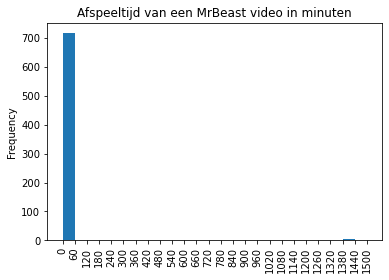

In [8]:
# voorbeeldcode
# histogram duurtijd in minuten

# klassegrenzen genereren (26 klassen tussen 0 tot 1500, klassebreedte is 60)
klassegrenzen = np.linspace(0, 1500, 26)  
print(klassegrenzen)

# histogram van duurtijd
mrBeast_videoduur_minuten.plot(kind="hist", bins=klassegrenzen, xticks=klassegrenzen, title="Afspeeltijd van een MrBeast video in minuten", rot=90)  

<div class="alert alert-box alert-info">
    De parameter <code>rot</code> van de methode <code>plot()</code> krijgt waarde <code>90</code> mee, waardoor de labels op de x-as gedraaid worden voor de leesbaarheid. 
    Je kan bv. ook als argument <code>figsize = (16,18)</code> meegeven, om de grafiek groter te maken.
</div>

Als je goed kijkt, dan kan je uit het histogram al een oorzaak afleiden waarom jouw schatting lager uitviel. 
-  Er zijn inderdaad veel video's die minder dan een uur duren.
-  Maar een aantal video's duren veel langer dan de rest. Er zijn er van rond de 1400 minuten!

### Opdracht 1.2.2
-  Teken een histogram van de duurtijd van de video's met een duurtijd tot 2 uur. Kies een klassebreedte van 3 minuten.

[  0.           3.07692308   6.15384615   9.23076923  12.30769231
  15.38461538  18.46153846  21.53846154  24.61538462  27.69230769
  30.76923077  33.84615385  36.92307692  40.          43.07692308
  46.15384615  49.23076923  52.30769231  55.38461538  58.46153846
  61.53846154  64.61538462  67.69230769  70.76923077  73.84615385
  76.92307692  80.          83.07692308  86.15384615  89.23076923
  92.30769231  95.38461538  98.46153846 101.53846154 104.61538462
 107.69230769 110.76923077 113.84615385 116.92307692 120.        ]


<AxesSubplot:title={'center':'Afspeeltijd in minuten van een MrBeast video van maximum twee uur'}, ylabel='Frequency'>

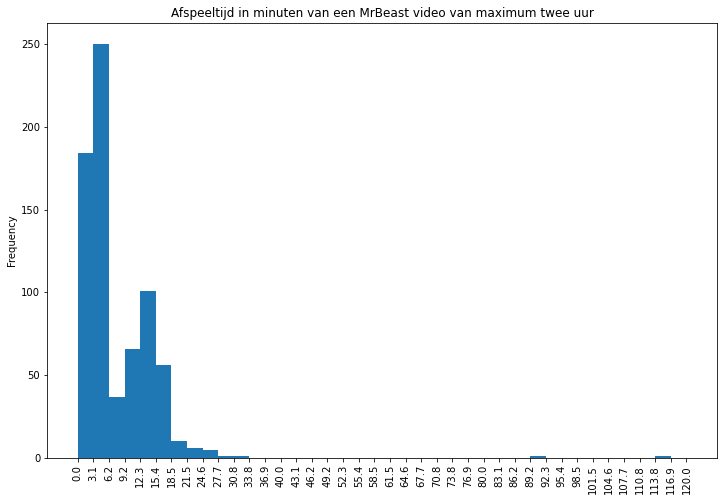

In [9]:
# voorbeeldcode
# histogram duurtijd in minuten

# klassegrenzen genereren (40 klassen tussen 0 tot 120, klassebreedte is 3)
klassegrenzen = np.linspace(0, 120, 40)  
print(klassegrenzen)

# histogram van duurtijd
mrBeast_videoduur_minuten.plot(kind="hist", bins=klassegrenzen, xticks=klassegrenzen, title="Afspeeltijd in minuten van een MrBeast video van maximum twee uur", rot=90, figsize = (12,8))  

Je ziet dat:
-  er veel korte video's zijn. De meeste videos duren slechts rond de 3 minuten; 
-  er ook veel video's van rond de 14 minuten zijn.

### Opdracht 1.2.3
-  Teken een histogram van de duurtijd van de video's met een duurtijd van meer dan 1300  minuten. Kies zelf een klassebreedte.

[1300.         1310.52631579 1321.05263158 1331.57894737 1342.10526316
 1352.63157895 1363.15789474 1373.68421053 1384.21052632 1394.73684211
 1405.26315789 1415.78947368 1426.31578947 1436.84210526 1447.36842105
 1457.89473684 1468.42105263 1478.94736842 1489.47368421 1500.        ]


<AxesSubplot:title={'center':'Afspeeltijd in minuten van een MrBeast video langer dan 1300 minuten'}, ylabel='Frequency'>

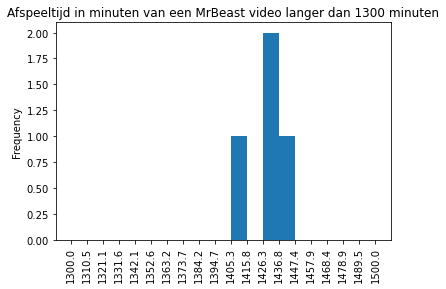

In [10]:
# voorbeeldcode
# histogram duurtijd in minuten

# klassegrenzen genereren (20 klassen tussen 1300 tot 1500, klassebreedte is 10)
klassegrenzen = np.linspace(1300, 1500, 20)  
print(klassegrenzen)

# histogram van duurtijd
mrBeast_videoduur_minuten.plot(kind="hist", bins=klassegrenzen, xticks=klassegrenzen, title="Afspeeltijd in minuten van een MrBeast video langer dan 1300 minuten", rot=90)  

In dit histogram zie je 4 video's die zeer lang zijn.

<div class="alert alert-box alert-success">
    Uitzonderlijk grote of uitzonderlijk kleine gegevens in een dataset worden <b>uitschieters</b> (of in het Engels <em>outliers</em>) genoemd.
</div>

<div class="alert alert-box alert-success">
     De <b>variatiebreedte</b> is het verschil tussen het kleinste en het grootste getal en is een <b>spreidingsmaat</b>.
    </div>

### Opdracht 1.2.4
-  Is het aangewezen de klassebreedte smaller of breder te maken?

In [ ]:
# andere klassebreedte


<AxesSubplot:title={'center':'Afspeeltijd in minuten van een MrBeast video van maximum twee uur'}, ylabel='Frequency'>

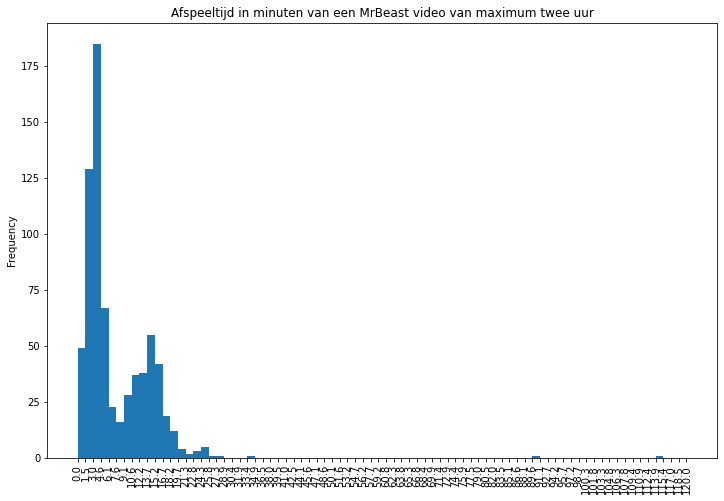

In [11]:
# voorbeeldcode
# smallere klassen
klassegrenzen = np.linspace(0, 120, 80)  
# print(klassegrenzen)

# histogram van duurtijd
mrBeast_videoduur_minuten.plot(kind="hist", bins=klassegrenzen, xticks=klassegrenzen, title="Afspeeltijd in minuten van een MrBeast video van maximum twee uur", rot=90, figsize = (12,8))  

<AxesSubplot:title={'center':'Afspeeltijd in minuten van een MrBeast video van maximum twee uur'}, ylabel='Frequency'>

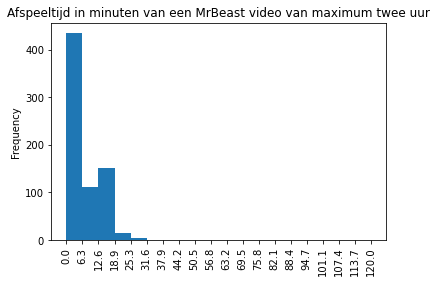

In [12]:
# voorbeeldcode
# bredere klassen
klassegrenzen = np.linspace(0, 120, 20)  
# print(klassegrenzen)

# histogram van duurtijd
mrBeast_videoduur_minuten.plot(kind="hist", bins=klassegrenzen, xticks=klassegrenzen, title="Afspeeltijd in minuten van een MrBeast video van maximum twee uur", rot=90)  

Antwoord:

Antwoord: De klassen teveel versmallen of verbreden kan het histogram minder duidelijk maken. Het kan chaotisch lijken of veel te weinig informatie bevatten.

<div>
    <font color=#690027 markdown="1">
        <h3>1.3. Effect van uitschieters op het gemiddelde</h3> 
    </font>
</div>

Om na te gaan wat de invloed van de uischieters op het gemiddelde is, verwijder je ze uit de dataset en bekijk je het effect.

### Voorbeeld 1.3.1

- Sorteer de dataset zo dat de video's van lang naar kort geordend. 

Om te sorteren gebruik je de `pandas`-methode `sort_values()`. <br>
Het argument `"duration_seconds"` wil zeggen dat je op basis van de kolom *duration_seconds* wilt sorteren.<br>
`ascending=False` betekent dat je van groot naar klein wilt sorteren (*ascending* is Engels voor stijgend).

In [13]:
# dataset sorteren van lang naar kort
mrBeast_gesorteerd = mrBeast.sort_values("duration_seconds", ascending=False)  
mrBeast_gesorteerd          # toon gesorteerde dataset

,title,id,published_at,description,viewCount,likeCount,commentCount,duration_seconds,subtitles
294,24 HOUR EXPLOSION GIVEAWAY! WIN GIFTCARDS,Fzh65vCyHWQ,2016-09-05 22:31:58,My worst intros series has killed a ton of bra...,642533,29935,4637,86402,"({}, ['Fzh65vCyHWQ'])"
275,"I Counted To 100,000!",xWcldHxHFpo,2017-01-09 00:00:39,I can't believe I did this..\n\nLike or I eat ...,27735910,1335798,125274,85687,"({}, ['xWcldHxHFpo'])"
260,Every Challenge I've Ever Done,KcsRxHwGz7A,2017-06-23 18:31:22,This is basically my life in a nutshell\n\nSUB...,835713,27539,4665,85686,"({}, ['KcsRxHwGz7A'])"
273,"Counting To 200,000 (Road To A Mil)",9CVwXBYVqVk,2017-02-18 00:00:03,I can't believe I did this\n*expand*\n\nLike I...,3651753,145373,19488,84878,"({}, ['9CVwXBYVqVk'])"
255,"Saying Logan Paul 100,000 Times",_FX6rml2Yjs,2017-08-19 14:00:58,I can't believe I did this\n\nSUBSCRIBE FOR A ...,22598278,911754,111967,61567,"({}, ['_FX6rml2Yjs'])"
164,"Saying Pewdiepie 100,000 Times",mGIpOtncmSM,2018-11-25 21:07:01,"I SAID HIS NAME 100,000 TIMES TO STOP TSERIES ...",25260680,1676994,174003,42520,"({}, ['mGIpOtncmSM'])"
261,Watching It's Everyday Bro For 10 Hours Straight,ZJwX2jTXWwQ,2017-06-17 21:06:02,"10 hours of suffering\n\nWE WROTE, SHOT, and E...",27651500,816373,71862,36011,"({}, ['ZJwX2jTXWwQ'])"
240,"Saying ""Keep Net Neutrality"" For 10 Hours",wMn8d7IeCYM,2017-12-17 20:37:34,I Am Officially Protesting The FCC\n\nSUBSCRIB...,2089962,78821,10091,36002,"({}, ['wMn8d7IeCYM'])"
351,Counting To 10000 In One Sitting,9Ax56oRhcZc,2016-02-01 00:27:55,"Counting To 10,000 In One Sitting\n\n\n-------...",58197421,686742,59855,12581,"({}, ['9Ax56oRhcZc'])"
264,"Reading The Longest English Word (190,000 Char...",IZVbzNRUlQI,2017-06-02 22:00:01,THE LONGEST WORD EVER\nWorst Intros (super fun...,34661799,798089,59484,6889,"({'IZVbzNRUlQI': [{'text': ""what's up guys tod..."


### Opdracht 1.3.1

- Hoe lang duurt de langste video? Geef een antwoord dat een duidelijke indicatie geeft.  

In [ ]:
# langste video


In [14]:
# voorbeeldcode
# langste video
# uren 
langste_video_duur_uur = 86402 / 3600
print("De langste video duurt", langste_video_duur_uur, "uur.")

De langste video duurt 24.000555555555554 uur.


Je ziet nu dat de langst durende video ongeveer 24 uur duurt. De langste video's zijn speciale stunts die gefilmd zijn. Ze duren 10 uur of langer. <br>
Als je verder kijkt dan de top 10 van langste video's wordt de duur al heel wat korter. 

<div class="alert alert-box alert-info">
<b>Slicing</b> is een techniek in pandas om gerangschikte gegevens, zoals hier een kolom in een DataFrame, in stukken op te delen. Dat kan door de <b>sleutel</b> van de kolom te laten volgen door <b>[m:n]</b>. Zo wordt enkel een deel van de kolom beschouwd: het deel van het element met index m t.e.m. het element met index n-1. Je kan ook m of n weglaten om vanaf het begin of tot het einde van de kolom af te zonderen. <br>Een aantal voorbeelden:
<ul>
  <li><code>kolom[2:7]</code> bevat het derde t.e.m. zevende element van <code>kolom</code>;</li>
  <li><code>kolom[:10]</code> bevat het eerste t.e.m. tiende element van <code>kolom</code>;</li>
  <li><code>kolom[10:]</code> bevat alle elemendten vanaf het elfde t.e.m. het einde van <code>kolom</code>.</li>
</ul>
    <br>Je kan bovendien ook een <b>voorwaarde</b>, <b> een logische uitdrukking</b>, gebruiken om via slicing bepaalde elementen uit een kolom te filteren. <br> 
    Bijvoorbeeld:
<ul>
  <li><code>kolom[kolom < 7]</code> bevat alle waarden uit <code>kolom</code> die kleiner zijn dan 7;</li>
  <li><code>kolom[90 < kolom]</code> bevat alle waarden uit <code>kolom</code> die groter zijn dan 90;</li>
  <li><code>kolom[kolom == "hallo"]</code> bevat alle waarden uit <code>kolom</code> die gelijk zijn aan de tekst "hallo".</li>    
    
</div>

### Opdracht 1.3.2

- Je filtert nu de top 10 van langst durende video's weg uit de dataset via slicing.

In [15]:
# voorbeeldcode
print(mrBeast_gesorteerd[:15])

                                                 title           id  \
294          24 HOUR EXPLOSION GIVEAWAY! WIN GIFTCARDS  Fzh65vCyHWQ   
275                              I Counted To 100,000!  xWcldHxHFpo   
260                     Every Challenge I've Ever Done  KcsRxHwGz7A   
273                Counting To 200,000 (Road To A Mil)  9CVwXBYVqVk   
255                    Saying Logan Paul 100,000 Times  _FX6rml2Yjs   
164                     Saying Pewdiepie 100,000 Times  mGIpOtncmSM   
261   Watching It's Everyday Bro For 10 Hours Straight  ZJwX2jTXWwQ   
240          Saying "Keep Net Neutrality" For 10 Hours  wMn8d7IeCYM   
351                   Counting To 10000 In One Sitting  9Ax56oRhcZc   
264  Reading The Longest English Word (190,000 Char...  IZVbzNRUlQI   
284  Reading The Entire Bee Movie Script But Everyt...  dSDBr0WjrwQ   
272  Reacting To The Reaction Of The Reaction To Th...  rqUvnLPvbrM   
76   $250,000 Influencer Rock, Paper, Scissors Tour...  Ih2WTyY62J4   
271   

In [16]:
# voorbeeldcode
# 10 langste video's verwijderen
mrBeast_gefilterd = mrBeast_gesorteerd[10:]      # verwijder eerste 10
print(mrBeast_gefilterd)

                                                 title           id  \
284  Reading The Entire Bee Movie Script But Everyt...  dSDBr0WjrwQ   
272  Reacting To The Reaction Of The Reaction To Th...  rqUvnLPvbrM   
76   $250,000 Influencer Rock, Paper, Scissors Tour...  Ih2WTyY62J4   
271               Reading The Youtube Terms Of Service  iengNekeTNo   
25                   $456,000 Squid Game In Real Life!  0e3GPea1Tyg   
645  The Vortex SMP Episode 1! Just Derping Around ...  DjMYkWCEan8   
214  I Donated $40,000 To A Random Twitch Fortnite ...  zE3FLbpu9-Q   
159   Last Youtuber To Leave Wins $100,000 - Challenge  71VpdDb8e6U   
701  Project Zomboid Let's Play ep. [03] Looting an...  ov0KQthQ50U   
55              $300,000 Influencer Trivia Tournament!  1V_03efSkg0   
617                Hearthstone - All Beards Challenge!  CuzdxsOXEZ8   
189    Donating $100,000 To A Random Fortnite Streamer  52ubXjlVzUY   
63              Last To Leave $800,000 Island Keeps It  NkE0AMGzpJY   
194   

In [17]:
# duurtijd in minuten
mrBeast_videoduur_gefilterd_minuten = mrBeast_gefilterd["duration_seconds"] / 60
mrBeast_videoduur_gefilterd_minuten

284    90.983333
272    33.483333
76     28.000000
271    25.950000
25     25.700000
645    25.316667
214    24.716667
159    24.650000
701    24.566667
55     24.083333
617    23.883333
189    23.033333
63     22.283333
194    22.033333
81     20.000000
703    19.900000
170    19.783333
188    19.783333
30     19.433333
236    19.350000
181    18.866667
80     18.683333
192    18.550000
137    18.483333
696    18.450000
         ...    
655     0.966667
706     0.966667
656     0.950000
11      0.916667
717     0.883333
722     0.866667
675     0.866667
611     0.866667
721     0.816667
697     0.800000
5       0.800000
657     0.783333
1       0.783333
674     0.766667
335     0.716667
7       0.683333
9       0.666667
618     0.633333
672     0.616667
600     0.600000
724     0.516667
723     0.483333
590     0.466667
690     0.433333
670     0.250000
Name: duration_seconds, Length: 718, dtype: float64

### Opdracht 1.3.3
- Laat voor de aangepaste dataset een histogram zien van de duurtijd. Kies zelf een geschikte klassebreedte.

De langste video hier duurt 5459 seconden of bijna 91 minuten.

[ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45. 50. 55. 60. 65. 70. 75. 80. 85.
 90. 95.]


<AxesSubplot:title={'center':'Afspeeltijd gefilterde lijst van een MrBeast video in minuten'}, ylabel='Frequency'>

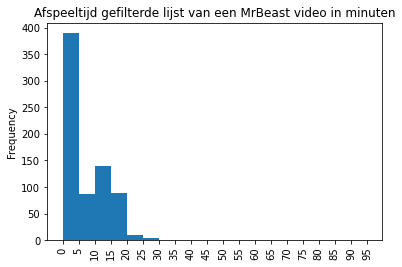

In [18]:
# voorbeeldcode
# nieuw histogram duurtijd in minuten

# klassegrenzen genereren (19 klassen tussen 0 tot 100, klassebreedte is 5)
klassegrenzen = np.linspace(0, 95, 20)  
print(klassegrenzen)

# nieuw histogram van duurtijd
mrBeast_videoduur_gefilterd_minuten.plot(kind="hist", bins=klassegrenzen, xticks=klassegrenzen, title="Afspeeltijd gefilterde lijst van een MrBeast video in minuten", rot=90)  

### Opdracht 1.3.4
-  Bereken het gemiddelde duurtijd van de video's voor de gefilterde dataset.
-  Hoeveel verschilt het originele gemiddelde met het gemiddelde zonder de top 10 langste video's?

In [20]:
# voorbeeldcode
# nieuw gemiddelde
gemiddelde_duur_na_filtering_minuten = mrBeast_videoduur_gefilterd_minuten.mean()
gemiddelde_duur_na_filtering_minuten

7.51863974001857

Antwoord: 

Antwoord: Het verschil bedraagt meer dan 12 minuten.

Dat is een uitzonderlijk groot verschil door slechts 10 van de 728 gegevens buiten beschouwing te laten. Je merkt dus dat uitschieters een grote invloed kunnen hebben op het gemiddelde.

<div class="alert alert-block alert-info"> 
Het is een discussiepunt of uitschieters uit een dataset wegfilteren wel een goed idee is. Langs de ene kant zorgen ze voor moeilijkheden om een volledige dataset beschrijven, zoals we hiernet hebben gemerkt bij het gemiddelde. Langs de andere kant kunnen ze misschien belangrijke informatie bevatten. Daarnaast is het niet altijd eenvoudig om te bepalen hoe groot of klein een gegeven moet zijn om als uitschieter te worden beschouwd.
</div>

<div>
    <font color=#690027 markdown="1">
        <h2>2. Mediaan</h2> 
    </font>
</div>

<div class="alert alert-box alert-success">
    Naast het gemiddelde is de mediaan ook een veelgebruikte <b>centrummaat</b>. De <b>mediaan</b> van een aantal getallen is het middelste getal nadat je de getallen geordend hebt van klein naar groot. In het geval van een even aantal is de mediaan het gemiddelde van de middelste twee getallen. 
    </div>

Je kan de mediaan op een analoge manier als het gemiddelde berekenen aan de hand van de methode `median()`.

### Opdracht 2.1
- Bereken uit de MrBeast dataset de mediaan van de lengte van een video (ongefilterd).

In [21]:
# voorbeeldcode
# mediaan in minuten
mediaan_duur_minuten = mrBeast_videoduur.median() / 60
mediaan_duur_minuten

4.575

Hoe komt het dat de mediaan van de duurtijd van een video kleiner is den de gemiddelde lengte van een video?

Antwoord:

Antwoord: Dat komt omdat uitschieters geen invloed hebben op de waaarde van de mediaan.

### Opdracht 2.2
-  Bereken ook de mediaan van de duurtijd van een video met de top 10 langste video's buiten beschouwing gelaten. 

<div class="alert alert-block alert-danger"> 
Tip: We hebben eerder al de top 10 weggefilterd. Je hoeft dit niet opnieuw te berekenen.
</div>

In [23]:
# voorbeeldcode
# nieuwe mediaan
mediaan_duur_na_filtering_minuten = mrBeast_videoduur_gefilterd_minuten.median()
mediaan_duur_na_filtering_minuten

4.516666666666667

Wat is nu het verschil tussen de mediaan van de originele en de gefilterde data?

Antwoord: 

Antwoord: Er is bijna geen verschil.

Waarom is dit verschil zo klein terwijl we bij het gemiddelde net een zeer groot verschil hadden?

Antwoord: 

Antwoord: Dat komt omdat uitschieters geen invloed hebben op de waaarde van de mediaan.

<div>
    <font color=#690027 markdown="1">
        <h2>3. Kwartielen en interkwartielafstand</h2> 
    </font>
</div>

<div class="alert alert-box alert-success">
    Er zijn nog andere <b>centrummaten</b>: het eerste en derde kwartiel (het tweede kwartiel is gelijk aan de mediaan).
    Stel dat de getallen geordend zijn van klein naar groot. Dan verdeelt de mediaan de getallen in twee groepen: het deel kleiner of gelijk aan de mediaan en het deel groter of gelijk aan de mediaan. Het <b>eerste kwartiel</b> is de mediaan van het eerste deel; het <b>derde kwartiel</b> is de mediaan van het tweede deel. <br><br>
    De <b>interkwartielafstand</b> is het verschil tussen het eerste en tweede kwartiel en is een <b>spreidingsmaat</b>.<br>
    De <b>variatiebreedte</b> is het verschil tussen het kleinste en het grootste getal en is ook een <b>spreidingsmaat</b>.
    </div>

### Voorbeeld 3.1
Je kan het eerste en derde kwartiel berekenen met de methode `quantile()`. In het onderstaande voorbeeld bereken je het eerste kwartiel van de lengte van een video in minuten.

In [24]:
mrBeast_videoduur_minuten.quantile(0.25)  # eerste kwartiel

3.066666666666667

De methode `quantile()` neemt een reëel getal als argument. Hier is dat `0.25` om aan te duiden dat je het eerste kwartiel wilt kennen, dus de waarde waarvoor 25 % van de andere gegevens kleiner is. 

### Opdracht 3.1
-  Bereken analoog het derde kwartiel van de lengte van de video's in minuten .

In [25]:
# voorbeeldcode
mrBeast_videoduur_minuten.quantile(0.75)  # derde kwartiel

12.625

-  Je hoeft je niet tot het eerste en derde kwartiel te beperken. Genereer een waarde zodat 90 % van de video's langer is dan deze waarde in minuten.

In [26]:
# voorbeeldcode
mrBeast_videoduur_minuten.quantile(0.10)  

2.0166666666666666

-  Bereken de mediaan van de lengte van een video opnieuw zonder de functie `median` te gebruiken.

In [27]:
# voorbeeldcode
mrBeast_videoduur_minuten.quantile(0.50)

4.574999999999999

-  Het verschil tussen het derde en het eerste kwartiel noemen we de **interkwartielafstand**. Bereken de interkwartielafstand in minuten van de lengte van de video's en laat een antwoordzin zien.

In [28]:
# voorbeeldcode
# interkwartielafstand
eerste_kwartiel = mrBeast_videoduur_minuten.quantile(0.25)
derde_kwartiel = mrBeast_videoduur_minuten.quantile(0.75)
interkwartielafstand = derde_kwartiel - eerste_kwartiel

print("De interkwartielafstand van de lengte van de MrBeats video's is", interkwartielafstand, "minuten.")

De interkwartielafstand van de lengte van de MrBeats video's is 9.558333333333334 minuten.


<div class="alert alert-block alert-info"> 
Het gemiddelde en de mediaan zijn voorbeelden van <b>centrummaten</b>. Zij proberen een beeld te geven van het midden of "centrum" van de gegevens in een dataset. De interkwartielafstand is een voorbeeld van een <b>spreidingsmaat</b>. Spreidingsmaten illustreren hoe ver de waarden uiteen liggen. 
</div>

<div>
    <font color=#690027 markdown="1">
        <h2>4. Boxplot</h2> 
    </font>
</div>

### Voorbeeld 4.1

Met de `pandas`-module kan je ook een **boxplot** tekenen. Voer de volgende code-cel uit.

<AxesSubplot:>

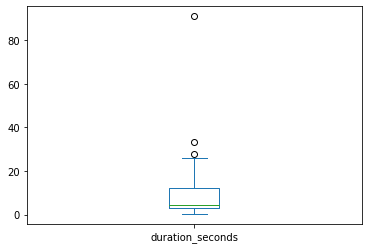

In [31]:
mrBeast_videoduur_gefilterd_minuten.plot(kind='box')

Een boxplot interpreteer je als volgt:
* De groene lijn stelt de mediaan voor.
* De bovenste en onderste lijn van de rechthoek stellen het eerste en derde kwartiel voor.
* De bovenste en onderste lijn op de verticale streep stellen het minimum en maximum voor.
* De bolletjes zijn uitschieters. `pandas` detecteert deze automatisch plaatst ze op een gepaste afstand van de 'box' van de boxplot.

<div class="alert alert-box alert-success">
    Er zijn nog andere centrum- en spreidingsmaten: de <b>centrummaat</b> <b>modus</b> en de <b>spreidingsmaat</b> <b>standaardafwijking</b>.<br>
    De <b>modus</b> is het gegeven met de hoogste (absolute of relatieve) frequentie. Werk je met klassen, dan is de <b>modale klasse</b> de klasse met de hoogste frequentie.<br>
    De <b>standaardafwijking</b> is de gemiddelde kwadratische afwijking t.o.v. het gemiddelde. <br> 
    
</div>

<div class="alert alert-box alert-info">
    Aan de hand van de <code>pandas</code>-module bereken je de <b>modus</b> met de methode <code>mode()</code> en de <b>standaardafwijking</b> met de methode <code>std()</code> (std van het Engelse <em>standard deviation</em>).
<br>
    Bij gebruik van de methode <code>mode()</code> kiest <code>pandas</code> zelf een zo precies mogelijke opdeling in klassen.
</div>

<div>
    <font color=#690027 markdown="1">
        <h2>5. Oefening</h2> 
    </font>
</div>

Beschouw de US tornado dataset `us_tornado_dataset_1950_2021.csv` opgeslagen in de map `data`. Deze dataset bevat gegevens over alle geregistreerde tornado's in de Verenigde Staten vanaf 1950 [3].

### Opdracht 5.1

Laad de dataset in en laat de volgende gegevens zien op het scherm:
* de gemiddelde breedte van een tornado (de breedte is opgeslagen in kolom `wid`);
* de mediaan, het eerste en het derde kwartiel van de startbreedte van een tornado (de startbreedte is opgeslagen in kolom `slat`);
* de interkwartielafstand van de eindbreedte van een tornado (de eindbreedte is opgeslagen in de kolom `elat`);
* een boxplot van de eindbreedte van een tornado.

Zijn er uitschieters bij de eindbreedte?

### Voorbeeldcode

In [32]:
import pandas as pd
import numpy as np
pd.set_option("display.min_rows", 50)     # om tot 50 rijen van een tabel op scherm  te tonen

In [33]:
# dataset
tornado = pd.read_csv("data/us_tornado_dataset_1950_2021.csv")   
tornado                                      # dataset op scherm tonen

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,1950-01-03,IL,3,3,0,39.1000,-89.3000,39.1200,-89.2300,3.60,130
1,1950,1,3,1950-01-03,MO,3,3,0,38.7700,-90.2200,38.8300,-90.0300,9.50,150
2,1950,1,3,1950-01-03,OH,1,1,0,40.8800,-84.5800,0.0000,0.0000,0.10,10
3,1950,1,13,1950-01-13,AR,3,1,1,34.4000,-94.3700,0.0000,0.0000,0.60,17
4,1950,1,25,1950-01-25,IL,2,0,0,41.1700,-87.3300,0.0000,0.0000,0.10,100
5,1950,1,25,1950-01-25,MO,2,5,0,37.6000,-90.6800,37.6300,-90.6500,2.30,300
6,1950,1,26,1950-01-26,TX,2,2,0,26.8800,-98.1200,26.8800,-98.0500,4.70,133
7,1950,2,11,1950-02-11,TX,2,0,0,29.4200,-95.2500,29.5200,-95.1300,9.90,400
8,1950,2,11,1950-02-11,TX,2,5,0,32.3500,-95.2000,32.4200,-95.2000,4.60,100
9,1950,2,11,1950-02-11,TX,2,6,0,32.9800,-94.6300,33.0000,-94.7000,4.50,67


In [34]:
# nodige kolommen
tornado_breedte = tornado["wid"]
tornado_startbreedte = tornado["slat"]
tornado_eindbreedte = tornado["elat"]

In [35]:
# gemiddelde breedte
gemiddelde_breedte = tornado_breedte.mean()
gemiddelde_breedte

106.57703010746322

In [36]:
# mediaan, eerste en derde kwartiel van de startbreedte
mediaan_startbreedte = tornado_startbreedte.median() 
eerste_kwartiel_startbreedte = tornado_startbreedte.quantile(0.25) 
derde_kwartiel_startbreedte = tornado_startbreedte.quantile(0.75)
print(mediaan_startbreedte, eerste_kwartiel_startbreedte, derde_kwartiel_startbreedte)

37.03 33.22 40.93


In [37]:
# interkwartielafstand van de eindbreedte
eerste_kwartiel_eindbreedte = tornado_eindbreedte.quantile(0.25) 
derde_kwartiel_eindbreedte = tornado_eindbreedte.quantile(0.75)
interkwartielafstand_eindbreedte = derde_kwartiel_eindbreedte  - eerste_kwartiel_eindbreedte
interkwartielafstand_eindbreedte

38.61

<AxesSubplot:>

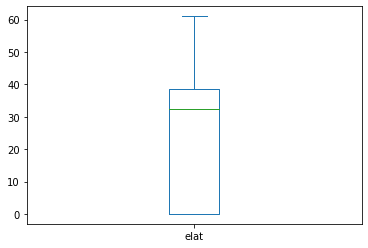

In [38]:
# boxplot van eindbreedte 
tornado_eindbreedte.plot(kind='box')

Er zijn geen uitschieters bij de eindbreedte.

### Referentielijst

[1} Dissfya. *MrBeast Youtube Stats and subtitles* [Dataset]. CC0. https://www.kaggle.com/datasets/dissfya/mr-beast-youtube-stats-and-subtitles

[2} YouTube. https://www.youtube.com/channel/UCX6OQ3DkcsbYNE6H8uQQuVA

[3] Danbraswell. *US Tornado Dataset 1950-2021* [Dataset]. CC0. https://www.kaggle.com/datasets/danbraswell/us-tornado-dataset-1950-2021 met data van de National Weather Service (NWS) in het publiek domein. https://www.spc.noaa.gov/wcm/#data

<img src="images/cclic.png" alt="Banner" align="left" width="100"/><br><br>

Notebook Python in wiskunde - Statistiek, van D. De Bolster, F. wyffels & N. Gesquière in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>.